<a href="https://colab.research.google.com/github/AlexandraBushueva/my-projects/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_4_%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%83%D1%81%D0%BF%D0%B5%D1%88%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование и прогнозирование успешности компьютерных игр

**Описание проекта**

Представлены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

- «EC» — «Для детей младшего возраста»
- «E» — «Для всех»
- «E10+» — «Для всех от 10 лет и старше»
- «T» — «Подросткам»
- «M» — «Для взрослых»
- «AO» — «Только для взрослых»
- «RP» — «Рейтинг ожидается»
- «RP 17+» — «Рейтинг ожидается - примерно 17+»

**Цель исследования:** выявить закономерности, определяющие успешность продаж игр

**План исследования**

1. Изучение общей информации о данных:
- импорт бибилиотек
- импорт данных из csv-файла
- изучение полей и их типов
2. Предобработка данных:
- удаление пропусков
- изменение типов данных
- обработка дубликатов
- добавление новых столбцов в таблицу
3. Исследовательский анализ данных
4. Формирование портрета пользователя каждого региона
5. Проверга гипотез
4. Общий вывод по исследованию

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (млн проданных копий)
- EU_sales — продажи в Европе (млн проданных копий)
- JP_sales — продажи в Японии (млн проданных копий)
- Other_sales — продажи в других странах (млн проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за оформление оглавления к проекту.

**Шаг 1. Загрузка данных: импорт бибилиотек, данных из csv-файлов, изучение полей и их типов**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [ ]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Проект сохранен в переменную и получена первичная информация о данных.

По общему описанию данных видим, что:
1. Необходимо изменить тип данных в столбцах:
- Year_of_Release: float64 → int64. Нужно перевести поле в формат целочисленных значений, т. к. в столбце указан год
- User_Score: object → float64. В столбце представлены числа в десятичном формате. Для расчетов необходимо перевести в тип float64
- Critic_Score: float64 → int64. В поле указаны целочисленные значения, а в типе данных десятичные.
2. В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating есть пропущенные значения. На следующих этапах исследования пропуски удалим, заменим, либо оставим без изменений
3. Необходимо привести наименования столбцы к нижнему регистру

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
С данными ознакомились первично и можем идти дальше

**Шаг 2. Предобработка данных**

In [ ]:
#Приведем наименования столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Классный способ приведения к нижнему регистру

In [ ]:
#В столбцах name и genre одинаковое кол-во заполненных полей (16713)
#Проверим, что пропуски в name дублируются с пропусками в genre
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
# Видим, что пропуски в name и genre соответствуют друг другу, т.к. таких строк всего 2, то удалим их
data = data.dropna(subset = ['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Тут пропусков мало и логично от них избавиться.

In [ ]:
# Посчитаем кол-во пропущенных значений в столбце year_of_release
data['year_of_release'].isna().sum()

269

In [ ]:
# Т.к. среди всех данных 269 пропусков занимают лишь 1,6% (269/16715), то такие данные тоже удалим
data = data.dropna(subset = ['year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Аналогично

In [ ]:
#Выведем уникальные значения в оставшихся столбцах с пропусками
print(data['critic_score'].unique())
print(data['user_score'].unique())
print(data['rating'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


В столбце **critic_score** — оценка критиков есть пропущенные значения. Скорее всего критики не оценивали данные игры по причине того, что игры недавно вышли или недостаточно популярные и критики еще о них не знают, либо игры находятся еще в процессе оценки, из-за этого возникли пропуски.

В столбце **user_score** — оценка пользователей тоже есть пропущенные значения. Возможно игры новые и еще не были оценены пользователями. Оценка tbd (To Be Determined (будет определено)) означает, что оценка игры находится в процессе и данные по рейтингу обновятся. Значение tbd заменим на NaN для удобства расчетов по остальным значениям.

Пропущенные значения в столбцах **critic_score**, **user_score** заменять не будем, т.к. оценки проставляются на основе уникального мнения и математически их посчитать не получится. Заменим пропуски на NaN и примем, что оценка не проставлялась.

Пропуски в столбце **rating** (рейтинг от организации ESRB) заменим на "не определен"="indefined".

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Согласен. Тут пропуски достаточно индивидуальны и субъективны и логично их оставить как есть.

In [ ]:
#В столбце user_score заменим tbd на Nan
data['user_score']=data['user_score'].replace({'tbd':np.NaN})
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [ ]:
#В столбце rating заменим пропущенные значения на undefiend
data['rating'] = data['rating'].fillna('undefined')
data['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Значения-заглушки это отличное решение в этом случае.

In [ ]:
#Заменим типы данных и проверим заполнение пропущенных значений
data = data.astype({"critic_score": "Int32"})
data = data.astype({"year_of_release": "Int32"})
data = data.astype({"user_score": "float32"})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int32  
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: Int32(2), float32(1), float64(4), object(4)
memory usage: 1.3+ MB


<div class="alert alert-block alert-warning">

### Комментарий ревьюера
    
#### Совет
    
Для экономии вычислительной памяти лучше всего перевести в int32

<div class="alert alert-block alert-info">

# Комментарий от студента
    
Учла
</div>

In [ ]:
# Удалим дублирующиеся строки
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int32  
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: Int32(2), float32(1), float64(4), object(4)
memory usage: 1.3+ MB


<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
На дубли проверили. Все супер.

Дубликатов не было

In [ ]:
#Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец
#data['total_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])

data['total_sales'] = data[['na_sales', 'eu_sales' , 'jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,undefined,0.01


<div class="alert alert-block alert-warning">

### Комментарий ревьюера
    
#### Совет
    
Для суммирования ты можешь использовать `df['x'] = df[['a', 'b' , 'c']].sum(axis=1)`

<div class="alert alert-block alert-info">

# Комментарий от студента
    
Учла
</div>

<div class="alert alert-block alert-success">

# Комментарий ревьюера ver.2
    
#### Успех
    
Здорово, что сразу воспользовалась.

Видим, что в некоторых регионах продажи равны 0. Возможно, игры в этих странах не продаются

**Шаг 3. Исследовательский анализ данных**

**3.1 Оценка количества игр, выпускаемых в разные годы**

In [ ]:
#Сгруппируем данные по году выпуска и посчитаем количество игр в каждом году
games_per_year = data['name'].groupby(data['year_of_release']).count()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

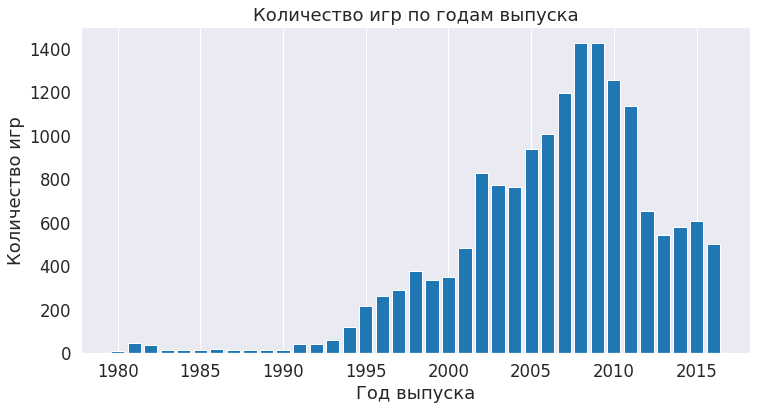

In [ ]:
# Визуализируем данные с помощью гистограммы
plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество игр по годам выпуска')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Классный график получился. По нему мы видим, как ведет себя выпуск платформ с каждым годом.

По полученным данным видим, что ежегодно тенденции количества выпускаемых игр меняются. До 1994 выпускалось менее 100 игр в год. С 1995 по 2009 гг. видим ежегодный рост. Исторический максимум был достигнут в 2008 г., когда было выпущено 1427 игр. С 2010 г. тренд изменился, и в год стало выпускаться не более 700 игр. Количество выпускаемых игр могло снизиться по нескольким причинам. Производители стали больше работать не над количеством выпускаемой продукции, а над качеством уже созданных игр, набравших популярность. Изменились "игровые каналы", больше пользователей стали прибегать к мобильным и онлайн играм.

**Для составления прогноза продаж на 2017 г. для анализа возьмем последние 4 года.** Т.к. сейчас декабрь 2016 г. (по условию), то данные за 2016 г. могут быть неполными. И для прогноза подойдут 2013, 2014, 2015 и 2016 гг. По гистограмме видим, что с 2013 г. прослеживается тенденция к небольшому росту количества выпускаемых игр. Можно предположить, что после обновления данных за 2016 г., мы тоже увидим рост. Остальные года для анализа брать не целесообразно, т.к. тенденции в игровой индустрии ежегодно меняются, как и факторы влияющие на количество продаж.

In [ ]:
# Заменим тип данных в столбце total_sales для построения гистограмм
data['total_sales'] = data['total_sales'].astype(int)

In [ ]:
# Создадим таблицу с продажами в разные года по платформам
popular_platform_year = (
    data
    .pivot_table(index=['platform', 'year_of_release'],
                 values=['total_sales'],
                 aggfunc=('sum'))
    .reset_index()
)
# Отфильтруем продажи >0, т.к. это может исказить визуализацию
popular_platform_year = popular_platform_year[popular_platform_year['total_sales'] != 0]
popular_platform_year

,platform,year_of_release,total_sales
0,2600,1980,8
1,2600,1981,16
2,2600,1982,13
3,2600,1983,1
12,3DS,2011,36
...,...,...,...
231,XB,2006,1
234,XOne,2013,12
235,XOne,2014,32
236,XOne,2015,39


In [ ]:
# Создадим таблицу с платформами, c наибольшими суммарными продажами за весь период данных (с 1980)
popular_platform = (
    data
    .pivot_table(index=['platform'],
                 values=['total_sales'],
                 aggfunc=('sum'))
    .reset_index()
)

# Переименуем столбцы
popular_platform.columns = ['platform', 'total_sales']
top_5 = popular_platform.sort_values(by = 'total_sales', ascending=False).head(5)
top_5

,platform,total_sales
16,PS2,632
28,X360,586
26,Wii,553
17,PS3,527
4,DS,414


<Figure size 864x576 with 0 Axes>

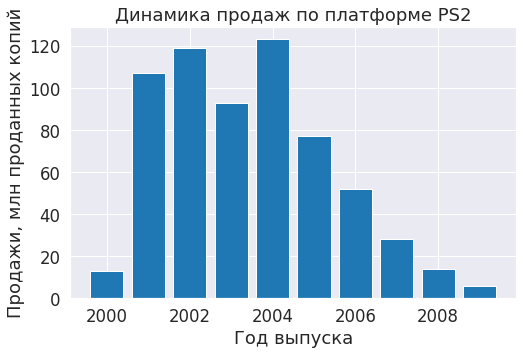

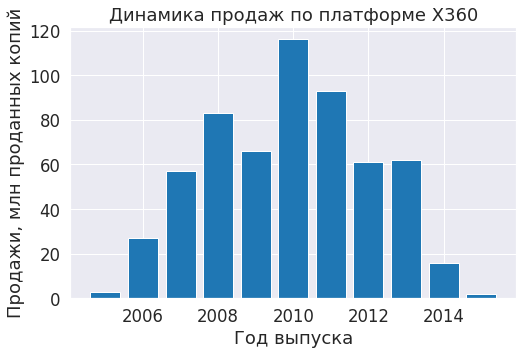

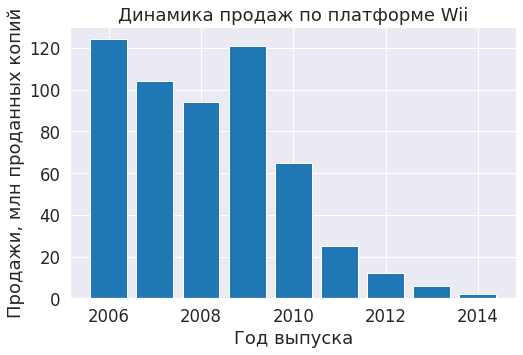

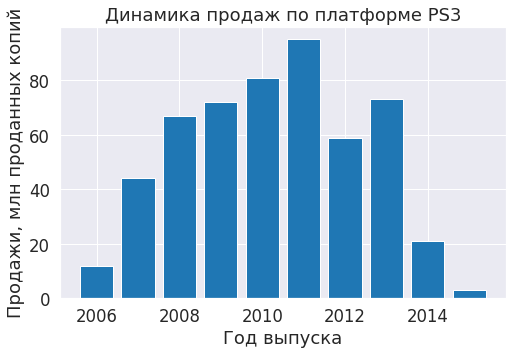

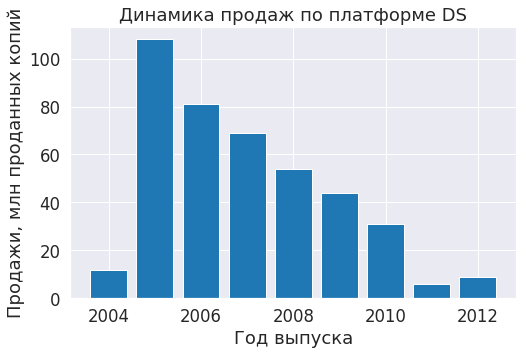

In [ ]:
#Отберем наименования топ-5 платформ
unique_platforms = top_5['platform'].unique()

#Построим гистограммы распределения продаж по годам по плафтормам топ-5
plt.figure(figsize=(12, 8))

for platform in unique_platforms:
    platform_data = popular_platform_year[popular_platform_year['platform'] == platform]
    plt.figure(figsize=(8, 5))
    plt.bar(platform_data['year_of_release'], platform_data['total_sales'])
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи, млн проданных копий')
    plt.title(f'Динамика продаж по платформе {platform}')
    plt.show()

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Тебе отлично получилось сразу вывести несколько графиков.

В топ 5 платформ по продажам попали:  PS2, X360, Wii, PS3, DS.
Из анализа продаж на пяти топовых платформах можно сделать следующие выводы:

- Платформы с высокими продажами обычно существуют на рынке до 10 лет
- Пик популярности платформы обычно приходится на период 3-5 лет существования на рынке
- Чаще всего популярность платформы начинает идти на спад после 5 лет существования на рынке


**3.2 Оценка актуального периода с 2013 по 2016 гг. Определение платформ, лидирующих по продажам, растущих, падающих**

In [ ]:
# Отфильтруем данные за период с 2013 по 2016 гг.
prediction = data.query('year_of_release >= 2013').reset_index(drop=True)
prediction

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undefined,14
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undefined,14
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0


<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
С актуальным периодом согласен. Нам незачем обращать внимание на старые данные.

In [ ]:
# Создадим таблицу с продажами по платформам за период с 2013 по 2016 гг.
popular_platform_year_act = (
    prediction
    .pivot_table(index=["platform", "year_of_release"],
                 values=["total_sales"],
                 aggfunc=("sum"))
    .reset_index()
)
popular_platform_year_act = popular_platform_year_act[popular_platform_year_act['total_sales'] != 0]
popular_platform_year_act


,platform,year_of_release,total_sales
0,3DS,2013,38
1,3DS,2014,28
2,3DS,2015,13
3,3DS,2016,8
5,PC,2013,3
6,PC,2014,4
7,PC,2015,2
9,PS3,2013,73
10,PS3,2014,21
11,PS3,2015,3


In [ ]:
# Создадим таблицу с платформами, c наибольшими суммарными продажами за весь период данных (с 1980)
popular_platform_act = (
    prediction
    .pivot_table(index=['platform'],
                 values=['total_sales'],
                 aggfunc=('sum'))
    .reset_index()
)

# Переименуем столбцы
popular_platform_act.columns = ['platform', 'total_sales']
top_5_act = popular_platform_act.sort_values(by = 'total_sales', ascending=False).head(5)
top_5_act

,platform,total_sales
4,PS4,205
3,PS3,97
10,XOne,96
0,3DS,87
9,X360,80


Text(0.5, 0, 'Год')

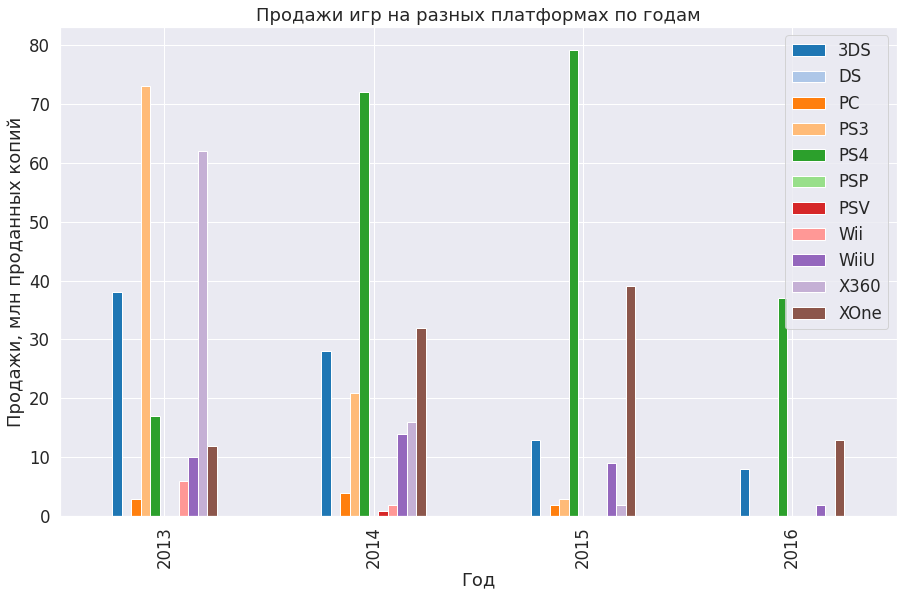

In [ ]:
# Построим график по продажам игр на разных платформах за период с 2013 года
sns.set(rc={"figure.figsize":(15, 9)}, font_scale = 1.5, style="darkgrid", palette="tab20")

ax = (prediction
 .pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")
 .plot(kind="bar", grid=True)
)

ax.legend(loc='upper right')

plt.title("Продажи игр на разных платформах по годам")
plt.ylabel("Продажи, млн проданных копий")
plt.xlabel("Год")

<div class="alert alert-block alert-warning">

### Комментарий ревьюера
    
#### Совет

Вот тут все же давай мы легенду уберем куда-то в угол графика. Она чуть мешает.

<div class="alert alert-block alert-info">

# Комментарий от студента
    
Поправила
</div>

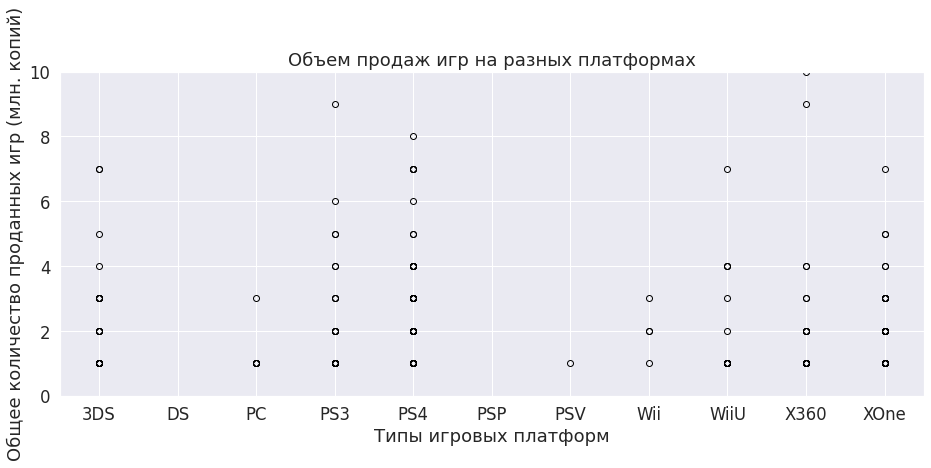

In [ ]:
#Построим диаграмму размаза по объему продажа игр на разных платформах

prediction.boxplot(column='total_sales', by='platform', figsize=(15, 6))
plt.title("Объем продаж игр на разных платформах")
plt.ylabel("Общее количество проданных игр (млн. копий)")
plt.xlabel("Типы игровых платформ")
plt.ylim(0, 10)
plt.suptitle('')
plt.show()

<div class="alert alert-block alert-danger">

### Комментарий ревьюера
    
#### Ошибка

А в этом случае давай мы простроим этот график без предварительной агрегации по сумме. А еще тут правильнее оставить хотя бы 5 наибоее перспективных платформ актуального периода.

<div class="alert alert-block alert-info">

# Комментарий от студента
    
Вячеслав, привет! Спасибо за комментарии. Не могу понять, как построить диаграмму размаха. Беру prediction, где сохранены актуальные данные, но без группировки как будто показывает только выбросы. Подскажи, пожалуйста, в каком направлении подумать. Пока нет идей, что я не так делаю
</div>

<div class="alert alert-block alert-warning">

# Комментарий ревьюера ver.2
    
#### Совет
    
Тут исправлено.


По поводу твоего вопроса. Я таких случаях рекомендую делать одну вещь. Вот на каждом этапе выполнения проекта перед каждым шагом проверяй тот код или результат, который хочешь исследовать. Построй Ящик с усами к этому датасету data на этапе после того, как ты названия к нижнему регистру приводишь. И потом после каждой строчки кода перезапускай график. Ты так заметишь где поменялся результат и поймешь на каком этапе ошибка появилась.  Это очень полезно делать и на других примерах кода.
    
    
А еще может пригодиться https://habr.com/ru/articles/468295/

Из полученных данных можно сделать выводы, что:
- По объему продаж с 2013 по 2016 гг. лидируют платформы: PS4 - 205 млн проданных копий, PS3 - 97, XOne - 96
- Имеют тенденцию к падению объема продаж платформы: X360, 3DS, PS3
- Потенциально прибыльными можно назвать платформы, которые ежегодно прирастают в продажах: PS4, XOne. Т.к. за 2016 г. данные не полные, то можно предположить, что и в 2016 г. после обновления данных будет рост продаж по сравнению с предыдущими годами

**3.3 Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков**

critic_score    0.370296
user_score     -0.030034
total_sales     1.000000
Name: total_sales, dtype: float64


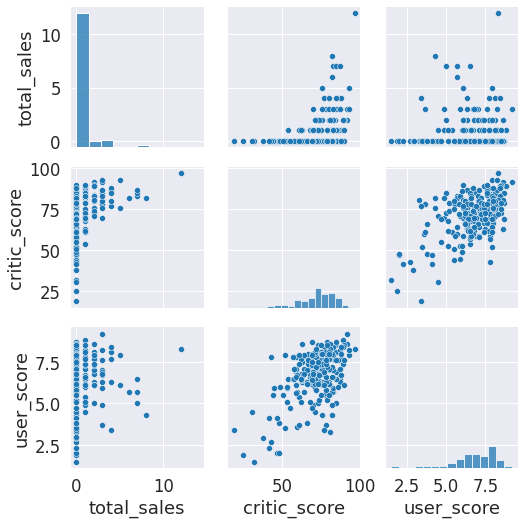

In [ ]:
#Определим корреляция между отзывами пользователей, критиков и продажами на платформе PS4
ps4_sales = prediction.query('platform == "PS4"')
ps4_cor = ps4_sales[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']
print(ps4_cor)

# Построим диаграмму рассеивания для платформы PS4
sns.pairplot(ps4_sales[ps4_sales.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
plt.show()

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Отличный способ для показания зависимостей оценок от продаж.

Между продажами и оценкой критиков существует прямая зависимость. Чем выше рейтинг критиков, тем больше копий игр продается. Но т.к. корреляция 0,4, то взаимовлияние факторов друг на друга незначительное.

Между оценкой пользователей и продажами выявлена слабая отрицательная зависимость. Но т.к. корреляция совсем мала -0,03, то можно сказать, что оценка пользователей не влияет на объем продаж.

Рассмотрим взаимовлияние показателей на других платформах. Возьмем потенциально прибыльную платформу XOne и платформу, у которой падают объемы продажа - X360.

critic_score    0.370163
user_score     -0.065722
total_sales     1.000000
Name: total_sales, dtype: float64


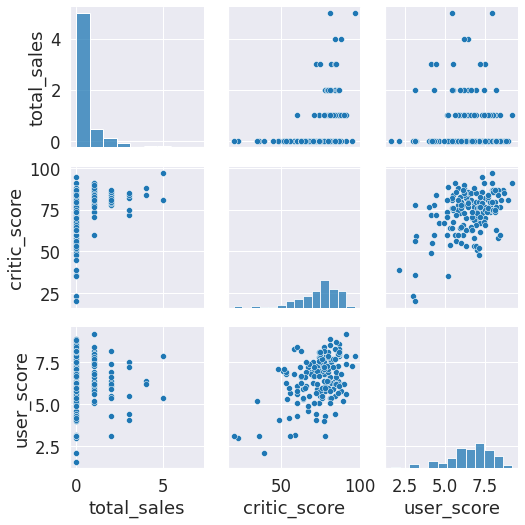

In [ ]:
#Определим корреляция между отзывами пользователей, критиков и продажами на платформе XOne
xone_sales = prediction.query('platform == "XOne"')
xone_cor = xone_sales[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']
print(xone_cor)

# Построим диаграмму рассеивания для платформы XOne
sns.pairplot(xone_sales[xone_sales.platform == "XOne"][['total_sales', 'critic_score', 'user_score']])
plt.show()

critic_score    0.370163
user_score     -0.065722
total_sales     1.000000
Name: total_sales, dtype: float64


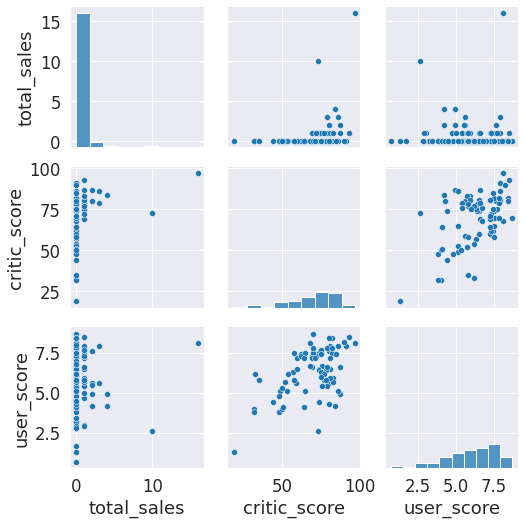

In [ ]:
#Определим корреляция между отзывами пользователей, критиков и продажами на платформе X360
x360_sales = prediction.query('platform == "X360"')
x360_cor = x360_sales[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']
print(xone_cor)

# Построим диаграмму рассеивания для платформы XOne
sns.pairplot(x360_sales[x360_sales.platform == "X360"][['total_sales', 'critic_score', 'user_score']])
plt.show()

Видим, что объемы сбыта игр в трех категориях платформ: 1. лидирующих по продажам, 2. набирающих обороты, 3. и падающих по объемам продаж - значимо не зависят от оценки критиков или пользователей.

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Выводы на основе данных нескольких платформ выглядят убедительнее.

**3.4 Оценка общего распределение игр по жанрам**

In [ ]:
# Группируем по жанру и считаем количество проданных игр
genre_count = prediction.groupby('genre')['total_sales'].count()
genre_count.sort_values(ascending=False)

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: total_sales, dtype: int64

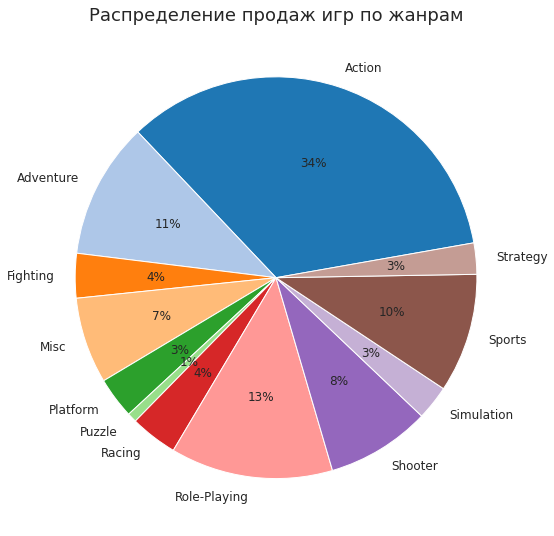

In [ ]:
# Создаем круговую диаграмму
plt.figure(figsize=(9, 10))
plt.pie(genre_count, labels=genre_count.index, autopct='%1.0f%%', startangle=10, textprops={'fontsize': 12})
plt.title('Распределение продаж игр по жанрам')

# Выводим на экран
plt.show()

Среди пользователей наиболее популярными являются игры в жанре Action, Role-Playing, Adventure, Sports.
Посмотрим, как распределялись продажи по годам в разрезе жанров.

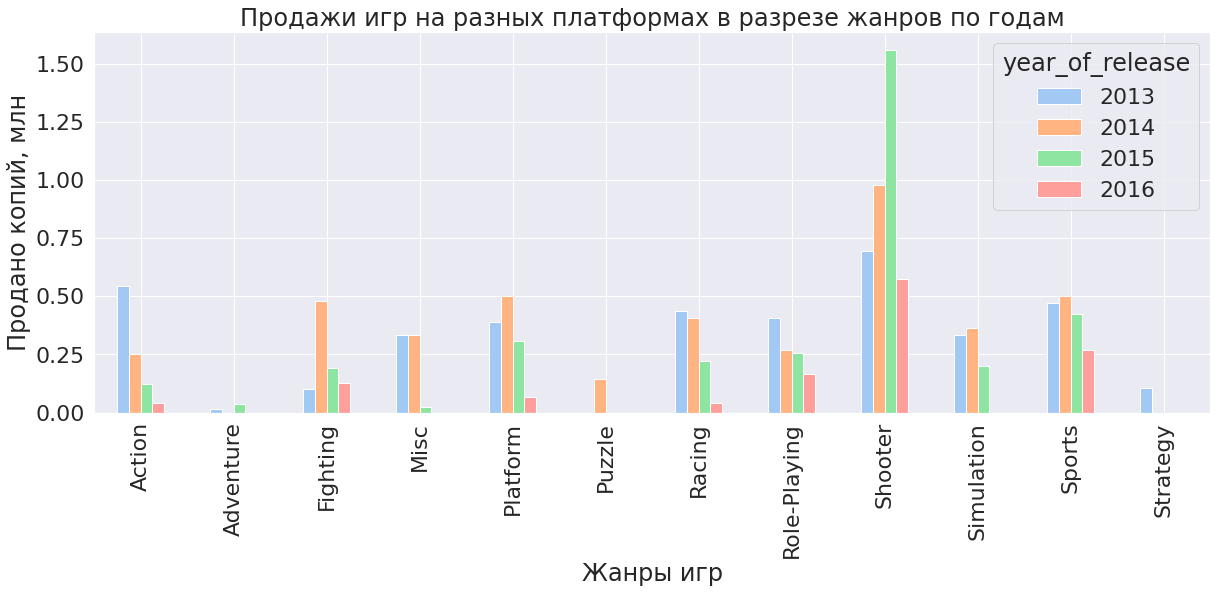

In [ ]:
# Распределение продаж игр на разных платформах в зависимости от жанра
(prediction
 .pivot_table("total_sales", index="genre", columns="year_of_release", aggfunc="mean")
 .plot(kind="bar", grid=True)
)

sns.set(rc={"figure.figsize": (20, 7)}, font_scale=2, palette="pastel")
plt.title("Продажи игр на разных платформах в разрезе жанров по годам")
plt.ylabel("Продано копий, млн")
plt.xlabel("Жанры игр");

<div class="alert alert-block alert-danger">

### Комментарий ревьюера
    
#### Ошибка
    
Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Экшена. Чтобы проверить это, стоит рассмотреть средние или медианные продажи.

<div class="alert alert-block alert-info">

# Комментарий от студента
    
Учла
</div>

<div class="alert alert-block alert-success">

# Комментарий ревьюера ver.2
    
#### Успех
    
Превосходно

В самых продаваемых жанрах Action, Role-Playing продажи в последние годы падают. Зато набирают популярность игры в жанре Shooter. Среди низкопродаваемых продаваемых игр можно выделить жанры: Adventure, Strategy, Puzzle.

**Шаг 4. Определение портрета пользователя каждого региона**

Cамые популярные платформы (топ-5)


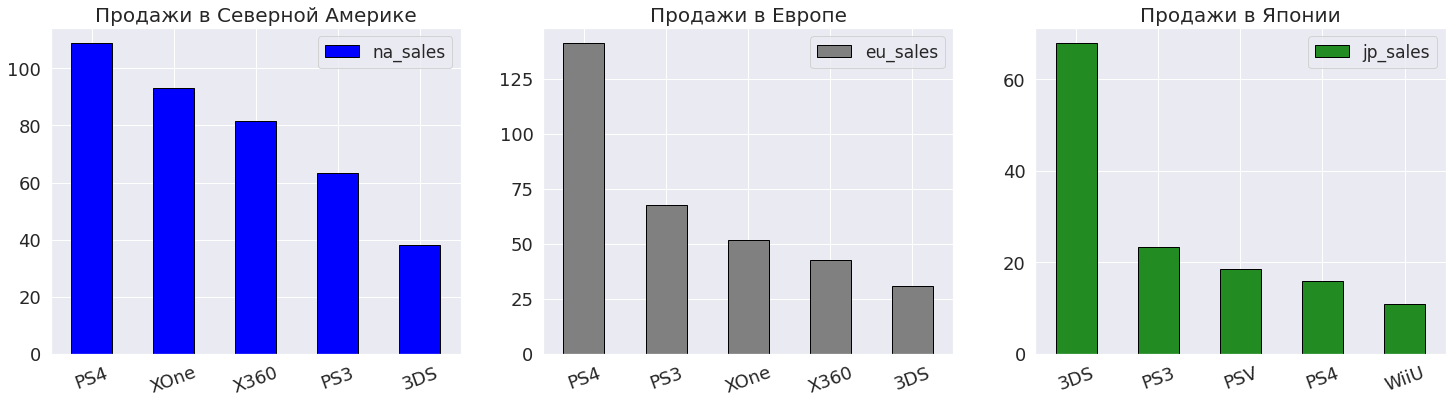

In [ ]:
#Самые популярные платформы (топ-5) по регионам
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = prediction.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax],
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

print ('Cамые популярные платформы (топ-5)')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

Самая популярная игровая платформа в Северной Америке и Европе: PS4. В Японии 3DS, PS4 занимает только четвертое место в общем объеме продаж.

В Северное Америке и Европе топ 5 популярных игровых платформ пересекается. В Японии в отличие от других регионов пользователи предпочитают еще такие платформы как WIIU, PSV.

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Первичное знакомство с регионами мы получили.

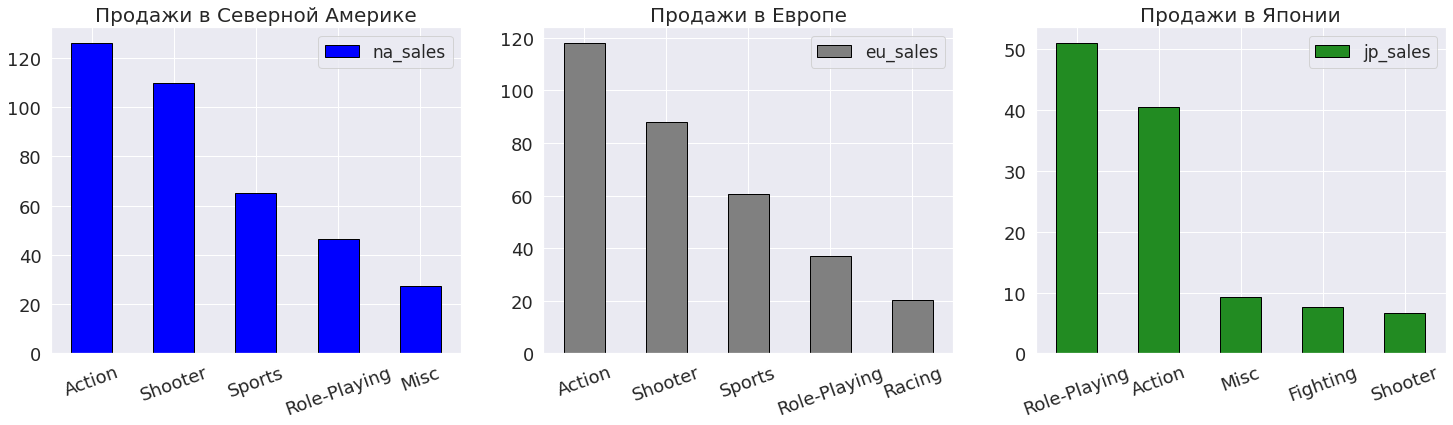

In [ ]:
#Самые популярные жанры (топ-5) по регионам
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

И снова пересекаются предпочтения пользователей Северной Америки и Европы. В топ-4 в этих регионах вошли жанры: Action, Shooter, Sports, Role-Playing. Пересечения могут быть связаны с особенностями развития культур в этих регионах. Во многом особенности копируются из-за глоболизации. Япония - азиатская страна со своей спецификой не похожей на страны Европы или Америки, из-за чего у пользователей отличаются игровые предпочтения по жанрам. В Японии чаще играют в жанры Role-Playing, Action, Misc

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
А вот здесь заметно, что Япония наиболее уникальна среди регионов.

/tmp/ipykernel_48/2911938953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['ESRB_description'] = prediction[prediction['rating'].notnull()]['rating'].map(ESRB_dict)


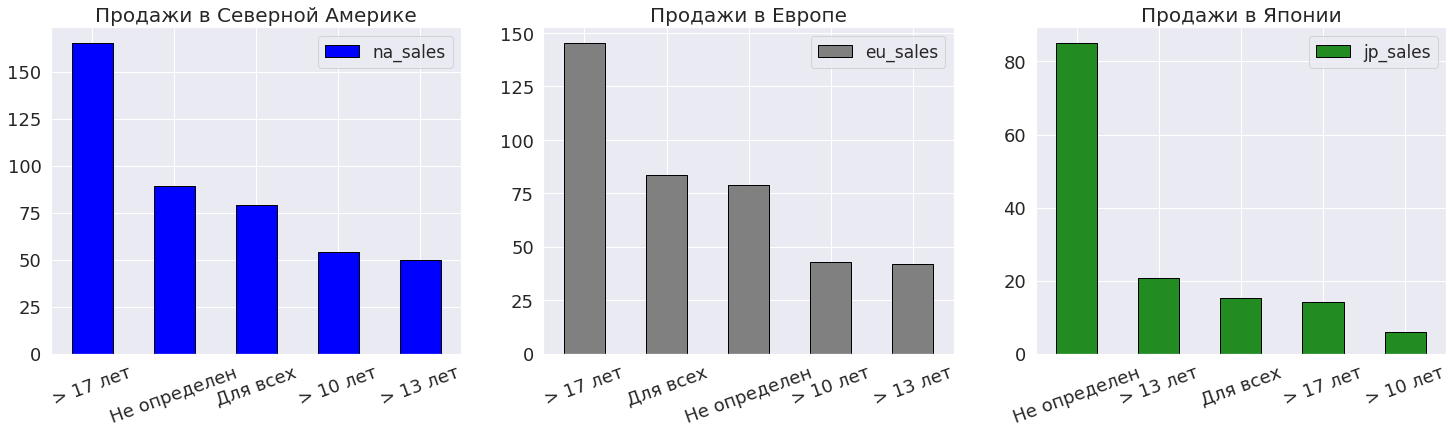

In [ ]:
#Влияние рейтинга ESRB на продажи в регионах
ESRB_dict = {'E': 'Для всех','EC': '> 6 лет', 'E10+': '> 10 лет', 'M': '> 17 лет', 'T': '> 13 лет', 'AO': 'Для взрослых', 'RP': 'Рейтинг обсуждается', 'undefined': 'Не определен'}
prediction['ESRB_description'] = prediction[prediction['rating'].notnull()]['rating'].map(ESRB_dict)

fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

Категория >17 лет наиболее популярна в Северной Америке и Европе, далее идет категория "для всех" и >10 лет.

В Японии снова отличающийся профиль. Из выявленных категорий наиболее популярна >13 лет, далее идет категория "для всех" и >17 лет.

<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Рассмотрев каждый из регионов мы пришли к выводу, что каждый из них имеет свою специфику.

**Шаг 5. Проверка гипотез**

**Гипотеза 1**

Нулевая гипотеза (H0): Средние пользовательские рейтинги на платформах Xbox One и PC одинаковы.

Альтернативная гипотеза (H1): Средние пользовательские рейтинги на платформах Xbox One и PC различаются.

Для проверки этой гипотезы используем t-тест для независимых выборок, так как у нас есть две разные платформы, и мы сравниваем пользовательские рейтинги между ними.

In [ ]:
# Выделим пользовательские рейтинги для Xbox One
xone_ratings = prediction[prediction['platform'] == 'XOne'].query("0 <= user_score <= 10")['user_score']

# Выделим пользовательские рейтинги для PC
pc_ratings = prediction[prediction['platform'] == 'PC'].query("0 <= user_score <= 10")['user_score']

# Зададим уровень значимости (alpha)
alpha = 0.05

# Проведем t-тест для независимых выборок
results = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

# Выведем результаты
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги одинаковы.')

p-значение: 0.147597032047728
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги одинаковы.


<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Гипотезы сформулированы и верно определен метод проверки. С выводом согласен.

**Гипотеза 2**

Нулевая гипотеза (H0): Средние пользовательские рейтинги для жанров Action и Sports равны.
    
Альтернативная гипотеза (H1): Средние пользовательские рейтинги для жанров Action и Sports различаются.
    
Используем t-тест для независимых выборок, так как выборки для двух жанров независимы друг от друга.

In [ ]:
# Выделим пользовательские рейтинги для жанра Action
action_ratings = prediction[prediction['genre'] == 'Action'].query("0 <= user_score <= 10")['user_score']

# Выделим пользовательские рейтинги для жанра Sports
sports_ratings = prediction[prediction['genre'] == 'Sports'].query("0 <= user_score <= 10")['user_score']


# Зададим уровень значимости (alpha)
alpha = 0.05

# Проведем t-тест для независимых выборок
results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Выведем результаты
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются между жанрами Action и Sports.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги одинаковы для жанров Action и Sports.")

p-значение: 1.4459989209941613e-20
Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются между жанрами Action и Sports.


<div class="alert alert-block alert-success">

### Комментарий ревьюера
    
#### Успех
    
Аналогично

**Шаг 6. Общий вывод**

В процессе проведенного исследования были проделаны следующие **итерации с данными**:
1. Приведены наименования столбцов к нижнему регистру
2. Удалены пропуски в столбцах name, genre, year_of_release
3. Заменены пропуски в столбце rating на "indefined"
4. Изменены типы данных в столбцах: Year_of_Release: float64 → int64, User_Score: object → float64, Critic_Score: float64 → int64
5. Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец total_sales

По итогам исследования были получены следующие **выводы о закономерностях, определяющих успешность продаж игр**:
1. С 2013 года намечена тенденция к росту продаж игр на всех платформах и всех жанров
2. Наиболее популярными игровыми платформами среди пользователей являются PS4, PS3, XOne
3. Наиболее прибыльными в 2017 году станут платформы PS4, XOne, показывающие ежегодный рост в объеме продаж с 2013 года
4. На объемы продаж игр не оказывают существенного влияния оценки критиков и пользователей
5. Среди наиболее популярных жанров игр выделяются: Action, Role-Playing, Adventure. Перспективным жанром, набирающим обороты продаж является Shooter
6. Наиболее популярная игровая платформа в Северной Америке и Европе: PS4, в Японии 3DS
7. В Севереной Америке и Европе предпочитают игры в жанрах: Action, Shooter, Sports. В Японии предпочитают жанры Role-Playing, Action, Misc
8. Категория игр "Для взрослых" наиболее популярна в Северной Америке и Европе, в Японии - "Подросткам" и "Для всех"
9. Средние пользовательские рейтинги на платформах Xbox One и PC одинаковы
10. Средние пользовательские рейтинги для жанров Action и Sports различаются

Итого **для увеличения роста продаж** необходимо:
1. Определить, в каком регионе наиболее популярен жанр выпускаемой игры для того, чтобы учесть специфику предпочтений пользователей. Популярность игр разных жанров в Севереной Америке и Европе часто пересекаются, в Японии могут отличаться
2. Определить наиболее популярные игровые платформы в регионе
3. На объемы продаж не влияют оценки критиков и пользователей, но для повышения NPS и создания клиентской базы для долгосрочных продаж важно их учесть
4. Отталкиваясь от региона распространения игры учесть категорию ESRB. Но если идти на массовый сегмент клиентов, то можно взять категория игр "Для всех"




<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Спасибо большое тебе за такую качественную работу. Мне было приятно проверять проект и делиться обратной связью. Особенно впечатлила Предобработка данных. Все достаточно структурировано и последовательно. Ты применяешь верные навыки для работы с кодом. Еще хочу отметить понятные и информативные графики. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Ящик с усами переделать.
* Определить самый успешный жанр по медиане или среднему.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>